<a href="https://colab.research.google.com/github/serafa11/business_financial_analysis/blob/main/LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("sales_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  90 non-null     object
 1   sales      90 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [ ]:
#convert the date column to datetime Dtype
data["timestamp"] = pd.to_datetime(data["timestamp"])

In [ ]:
#prepare the data, first set the column names  to 'ds' and 'y' for this one
data = data.rename(columns={"ts" : "ds", "sales" : "y"})


In [ ]:
# new step, creating the model using prophet
from prophet import Prophet
model = Prophet()
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ts      90 non-null     datetime64[ns]
 1   y       90 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


Generate future dates for the next 2 years

In [ ]:
future_dates = model.make_future_dataframe(periods=365*2, freq='D')

Make predictions

In [ ]:
forecast = model.predict(future_dates)

Visualize the results

<Figure size 640x480 with 0 Axes>

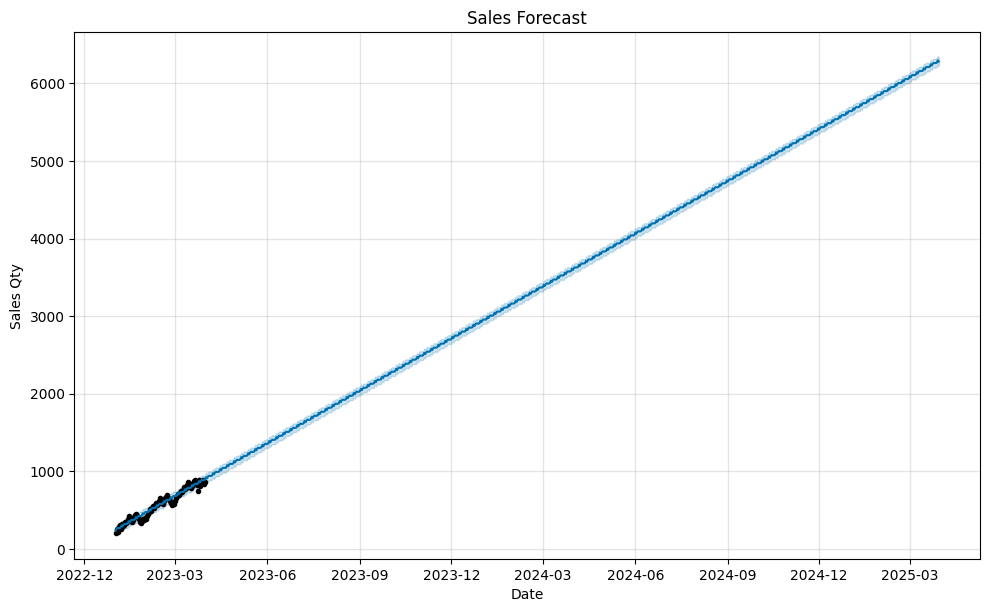

In [ ]:
plt.figure()
model.plot(forecast, xlabel = "Date", ylabel= 'Sales Qty')
plt.title("Sales Forecast")
plt.show()
